## Mental Accounting

This notebook aims to recreate some of the findings of **Thaler, Richard (1985), “Mental Accounting and Consumer Choice,” Marketing Science, 4 (3), 199–214.** Specifically, we try to see if LLMs like **ChatGPT** abide by some rules of Mental Accounting and Prospect Theory.


In [2]:
import openai
import time
import matplotlib.pyplot as plt
import os 

In [3]:
# Get API key (previously saved as environmental variable)
openai.api_key = os.environ["OPENAI_API_KEY"]

In [4]:
answers = []
for _ in range(10): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-3.5-turbo",
        max_tokens = 1,
        temperature = 0.5,
        messages = [
        {"role": "user", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting.
          Mister A wins 100$ in a lottery. The same day he spills something on the carpet in 
          his apartment and has to pay his landlord 80$ for cleaning. Mister B wins 20$ in the lottery.
          Who is happier? Reply with one letter only: A for Mister A and B for Mister B."""},
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers.append(answer.strip())
    

With *system* role

In [151]:
answers = []
for _ in range(50): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-3.5-turbo",
        max_tokens = 1,
        temperature = 0.6,
        messages = [
        {"role": "user", "content": """Mister A wins 100$ in a lottery. The same day he spills something on the carpet in 
          his apartment and has to pay his landlord 80$ for cleaning. Mister B wins 20$ in the lottery.
          Who is happier? Reply with one letter only: A for Mister A and B for Mister B."""},
        #{"role": "system", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting.
    #   Please answer only with 1 letter: A for Mister A, B for Mister B."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers.append(answer.strip())
    

In [5]:
B = answers.count("B")
A = answers.count("A")
C = answers.count("C")
print(f"The answer A was chosen {A} times, while B was chosen {B} times. Equally happy was stated {C} times.")

The answer A was chosen 1 times, while B was chosen 9 times. Equally happy was stated 0 times.


### Plotting the results

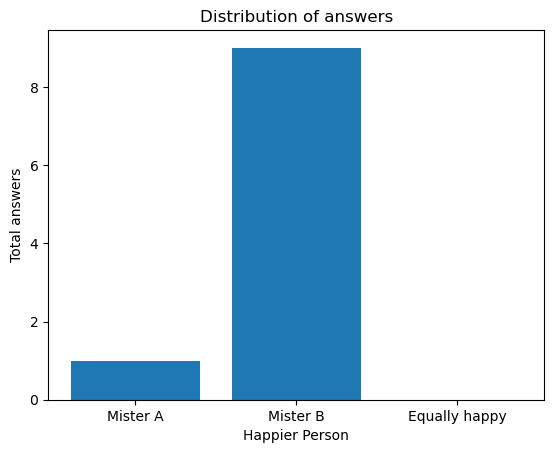

In [6]:
# Set labels
labels = ['Mister A', 'Mister B', 'Equally happy']

# Create a bar graph
plt.bar(labels, [A, B, C])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Distribution of answers')

# Show the plot
plt.show()


Playing around with the *temperature* parameter I found out, that for lower values our results are as desired, whereas 
for higher values, no real systematic trend appeared to be present. The results were rather random.
Also I am not yet sure, if setting a context with the *system* role really worked.